# Figure 1: Visualize single molecules and apply ChromaFactor

### Recreate Figure 1 from the manuscript.

Example plotting cells, processing ORCA data, plotting median maps.

In [1]:
import pandas as pd
import numpy as np

In [2]:
# data can be found here: https://zenodo.org/records/4741214

orca_dir = "/srv/home/lgunsalus/data/orca/"
dna_file = orca_dir + "dnaData_exp1.csv"
rna_file = orca_dir + "rnaData_exp1.csv"

In [3]:
dna_data = pd.read_csv(dna_file)
rna_data = pd.read_csv(rna_file)

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
import sys
sys.path.append('code')  

from DeepLearningChromatinStructure_code import *  # Rajpurkar et al. ORCA processing code 
from plot import *                                 # Plotting functions for 2D and 3D data
from utils import *                                # Util functions for 2D and 3D data
from ChromaFactor import *                         # ChromaFactor

In [6]:
# import importlib
# #importlib.reload(DeepLearningChromatinStructure_code)  # Reload the module after you've made changes to the file
# importlib.reload(plot) 

# Process ORCA data

In [9]:
seed = 42
tag = "exp_1"

xyzdat, rnadat = read_data(dna_file, rna_file) # read in data
xyzdat = fill_in_missing(xyzdat)               # fill in missing points with nas
xyzfilt, rnafilt = filter_dat(xyzdat, rnadat, req_xyz_perc = 0.5, interpol=True, norm = True, bool_thresh = 1)

In [10]:
rna_list = ["AbdB_Main_Exon", "AbdB_Short_Exon", "AbdA_Exon", "Ubx_Exon", "Antp_Exon", "Scr_Exon", "Dfd_Exon",
            "pb_Exon", "lab_Exon", "Iab4_ncGene", "bxd_ncGene", "inv_Exon", "en_Whole_Gene", "ftz_Whole_Gene",
            "zen_Whole_Gene", "Ama_Whole_Gene", "sna_Whole_Gene", "elav_Exon", "AbdB_Main_Intron", 
            "AbdB_Short_Intron", "AbdA_Intron", "Ubx_Intron", "Antp_Intron", "Scr_intron", "Dfd_Intron", 
            "pb_Intron", "lab_Intron", "inv_Intron", "elav_Intron"]

In [11]:
all_maps = np.asarray(xyzfilt)
median_distance_map_combined = np.nanmedian(all_maps, axis = 0)

# generate contact map
contact_th = 500
contact_map_combined = np.sum(all_maps<contact_th, axis=0) / np.sum(np.isnan(all_maps)==False, axis=0)

# Plot example cell

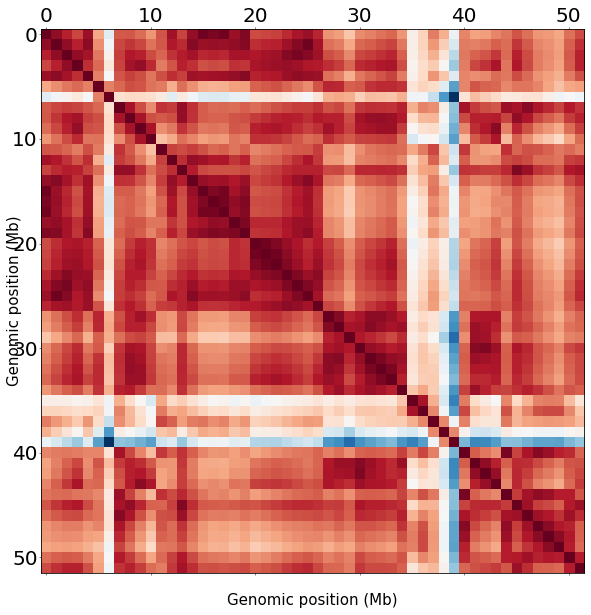

In [10]:
single_map = xyzfilt[4]
ex_map = get_distance_matrix(single_map)
plot_distance_matrix(ex_map, cmap_order="forward")

In [11]:
%matplotlib inline

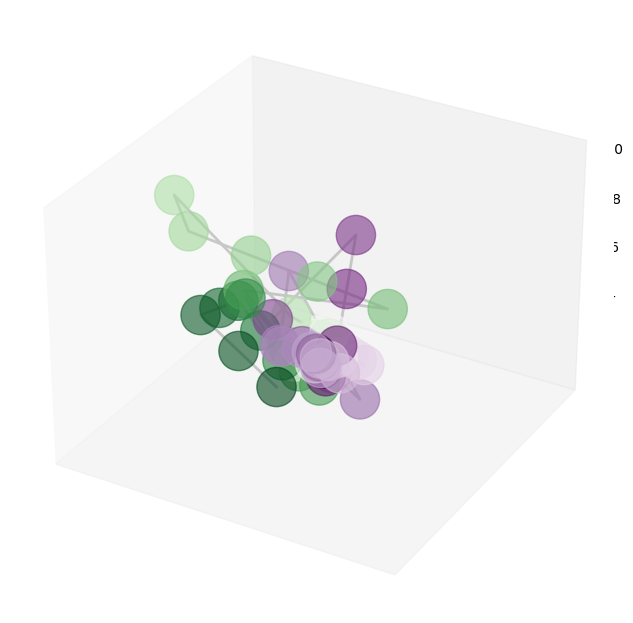

In [12]:
original = pd.DataFrame(single_map, columns=['x', 'y', 'z'])
plot_in_3d(original,point_size=800)

In [13]:
cur_cell_number = 0
rna_data.iloc[cur_cell_number]['Abd-A_Exon']

0

### Mapping dictionaries

In [14]:
rna_to_index = dict(zip(rna_list, list(range(len(rna_list)))))
index_to_rna = dict(zip(list(range(len(rna_list))),rna_list))

# Plot median distance maps

In [20]:
gene_name = "AbdA_Exon"
rna_no = rna_to_index[gene_name]
y = rnafilt.T[rna_no]

positive_mask = np.array(y, dtype=bool)
negative_mask = ~np.array(y, dtype=bool)

positive = all_maps[positive_mask]
negative = all_maps[negative_mask]

# Compute distance matrices
positive_maps = np.asarray([get_distance_matrix(single_map) for single_map in positive])
negative_maps = np.asarray([get_distance_matrix(single_map) for single_map in negative])

# Calculate the median of distance matrices
positive_median = np.nanmedian(positive_maps, axis = 0)
negative_median = np.nanmedian(negative_maps, axis = 0)

In [21]:

gene_name = "AbdA_Exon"
rna_no = rna_to_index[gene_name]
# Extract the RNA filter data corresponding to the gene index,
# transposed for correct orientation.
y = rnafilt.T[rna_no]


positive_mask = np.array(y, dtype=bool)
negative_mask = ~np.array(y, dtype=bool)

positive = all_maps[positive_mask]
negative = all_maps[negative_mask]

# Compute distance matrices for each set of positive maps 
positive_maps = np.asarray([get_distance_matrix(single_map) for single_map in positive])
# Compute distance matrices for each set of negative maps 
negative_maps = np.asarray([get_distance_matrix(single_map) for single_map in negative])

# Calculate the median of the positive distance matrices along the 0th axis (row-wise median).
positive_median = np.nanmedian(positive_maps, axis=0)
# Calculate the median of the negative distance matrices along the 0th axis (row-wise median).
negative_median = np.nanmedian(negative_maps, axis=0)


In [22]:
negative_maps.shape

(12577, 52, 52)

In [23]:
positive_maps.shape

(3743, 52, 52)

In [24]:
positive_median.shape

(52, 52)

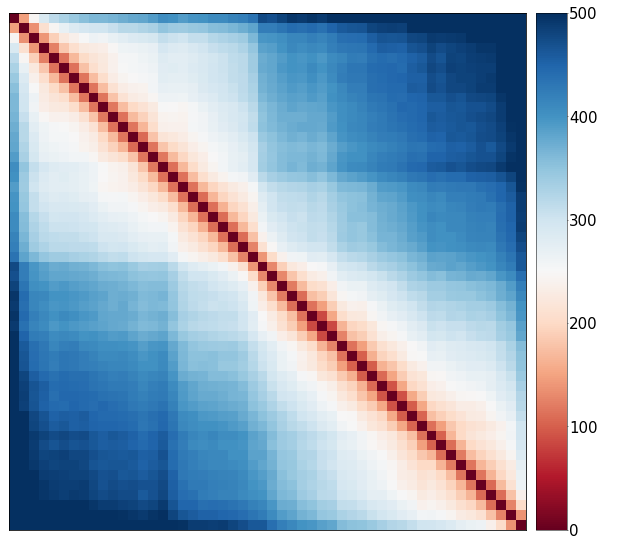

In [25]:
plot_distance_matrix(positive_median, cmap_order="forward", 
                    title = f"{gene_name}, Positive Maps, n={len(positive)}",
                     vmax=500,
                    ax_label = None, hide_all=True,
                    colorbar_labels=' ')

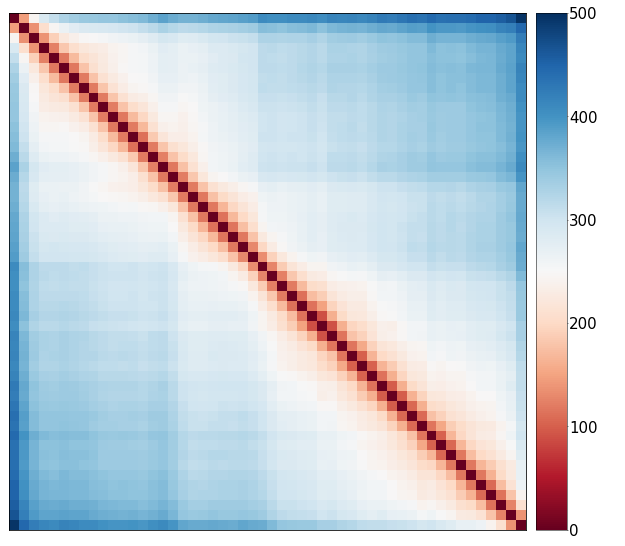

In [26]:
plot_distance_matrix(negative_median, cmap_order="forward", 
                    title = f"{gene_name}, Positive Maps, n={len(positive)}",
                    vmax=500,
                    ax_label = None, 
                     hide_all=True,
                     colorbar_labels=' ')

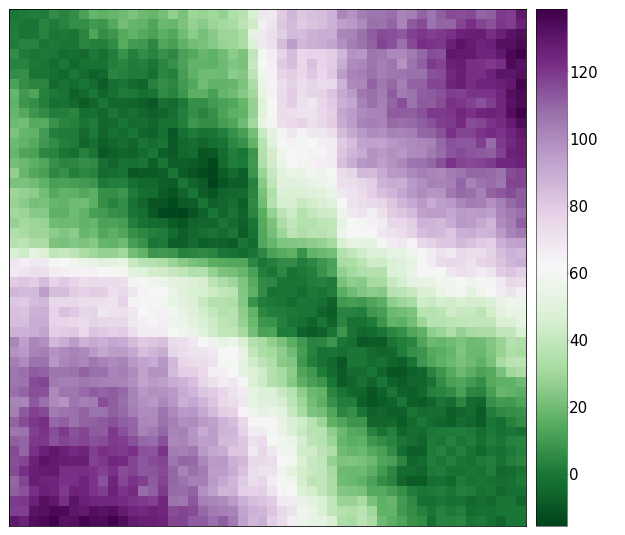

In [27]:
plot_distance_matrix(positive_median - negative_median, cmap_order="forward", 
                    title = f"{gene_name}, Positive - Negative Maps", alt_cmap = 'PRGn_r',
                    ax_label = None, hide_all=True,
                                        colorbar_labels=' ')

# Plot individual cell examples

### (transcribed and not transcribed)

In [28]:
np.sum(y)

3743

In [29]:
y.shape

(16320,)

In [30]:
cell_no = 16319
label = y[cell_no]
label

1

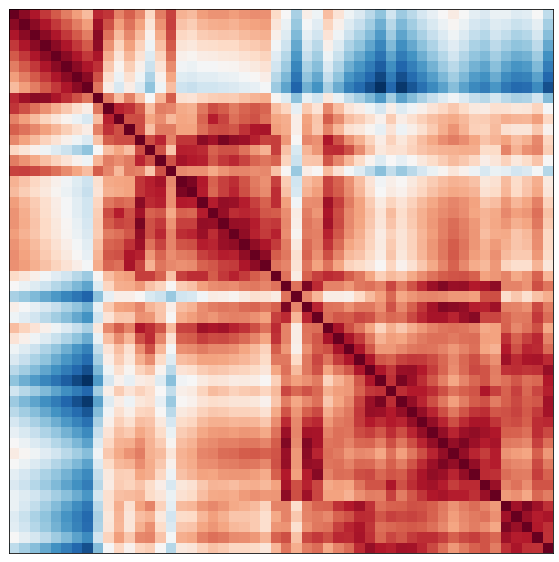

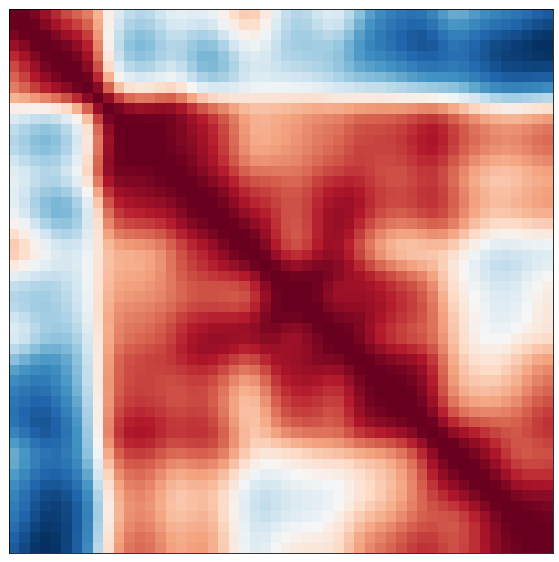

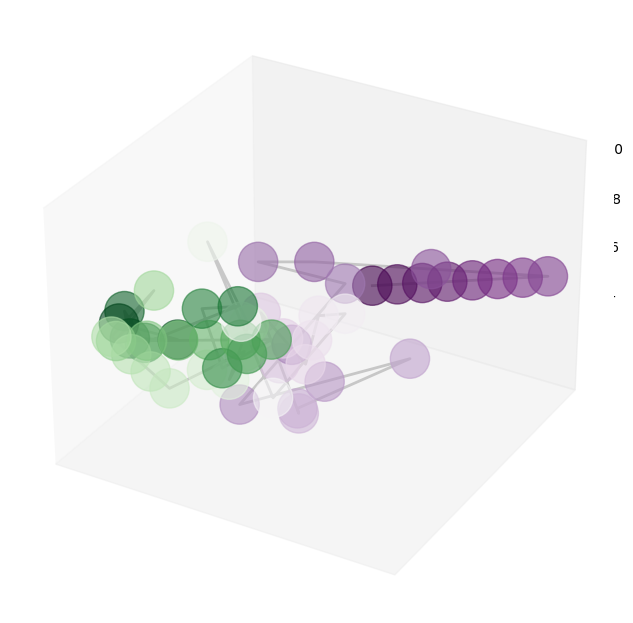

In [44]:
single_map = xyzfilt[cell_no]
ex_map = get_distance_matrix(single_map)
original = pd.DataFrame(single_map, columns=['x', 'y', 'z'])
plot_distance_matrix(get_distance_matrix(single_map), cmap_order = "forward",
                    hide_all=True, ax_label=None)
normalized = normalize_map(get_distance_matrix(single_map), single_map, plot_maps=False)
plot_distance_matrix(normalized, cmap_order = "rev",
                    hide_all=True, ax_label=None)

plot_in_3d(original, point_size=800)

In [34]:
y.shape

(16320,)

### Plot non-transcribed cell

0


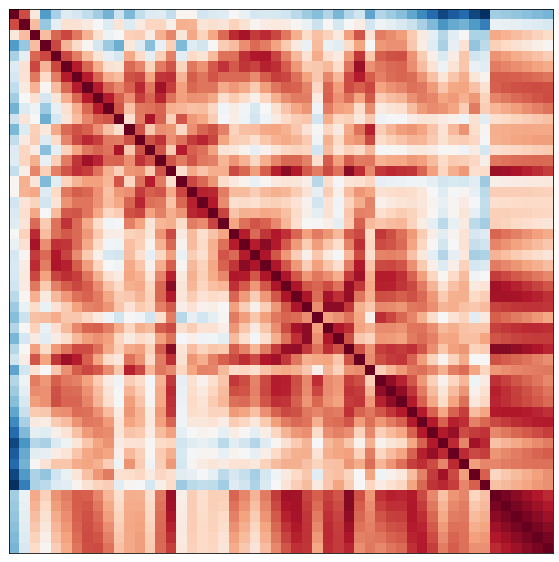

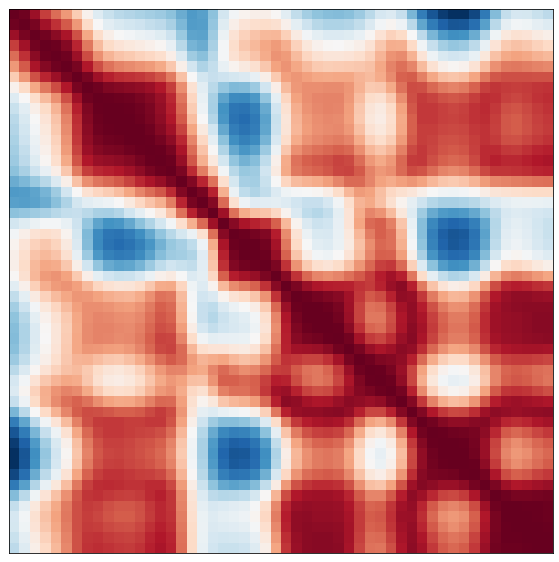

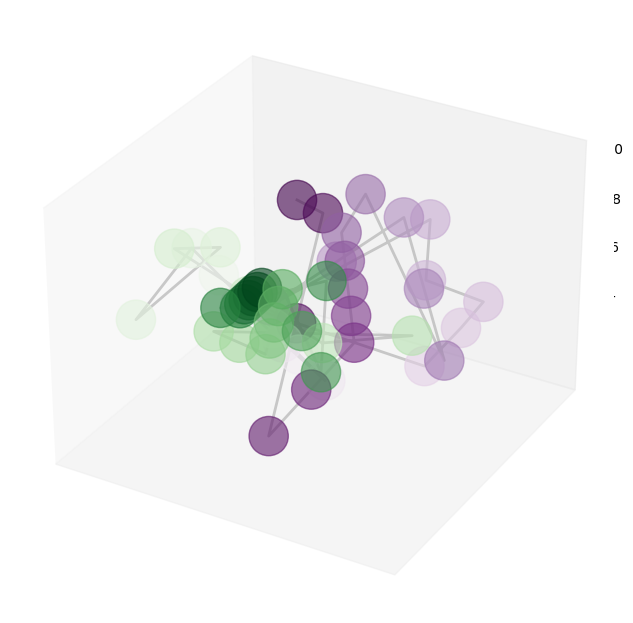

In [47]:
cell_no = 3
label = y[cell_no]
print(label)

single_map = xyzfilt[cell_no]
ex_map = get_distance_matrix(single_map)
#plot_distance_matrix(ex_map, cmap_order="forward")
original = pd.DataFrame(single_map, columns=['x', 'y', 'z'])
plot_distance_matrix(get_distance_matrix(single_map), cmap_order = "forward",
                    hide_all=True, ax_label=None)
normalized = normalize_map(get_distance_matrix(single_map), single_map, plot_maps=False)
plot_distance_matrix(normalized, cmap_order = "rev",
                    hide_all=True, ax_label=None)

plot_in_3d(original, point_size=800)

# Perform NMF

### Map normalization

In [20]:
xyzdat, rnadat = read_data(dna_file, rna_file) # read in data
xyzdat = fill_in_missing(xyzdat)               # fill in missing points with nas
xyzfilt, rnafilt = filter_dat(xyzdat, rnadat, req_xyz_perc = 0.2, interpol=True, norm = False, bool_thresh = 1)

In [21]:
all_maps = np.asarray([get_distance_matrix(single_map) for single_map in xyzfilt])
normalized = (all_maps-np.min(all_maps))/(np.max(all_maps)-np.min(all_maps))
median_distance_map_combined = np.nanmedian(normalized, axis = 0)
contact_th = 500
contact_map_combined = np.sum(all_maps<contact_th, axis=0) / np.sum(np.isnan(all_maps)==False, axis=0)

### Run

In [26]:
normalized.shape

(23641, 52, 52)

In [22]:
# Run ChromaFactor
chroma_factor = ChromaFactor(normalized)

In [23]:
# Reconstruct maps
new_maps = chroma_factor.reconstruct_maps()

In [24]:
# Measure reconstruction error
print(f"Reconstruction Error: {chroma_factor.reconstruction_err}")

Reconstruction Error: 34.12657712368615


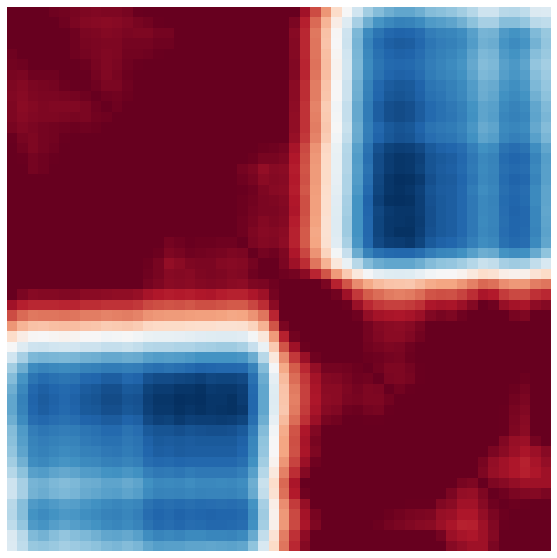

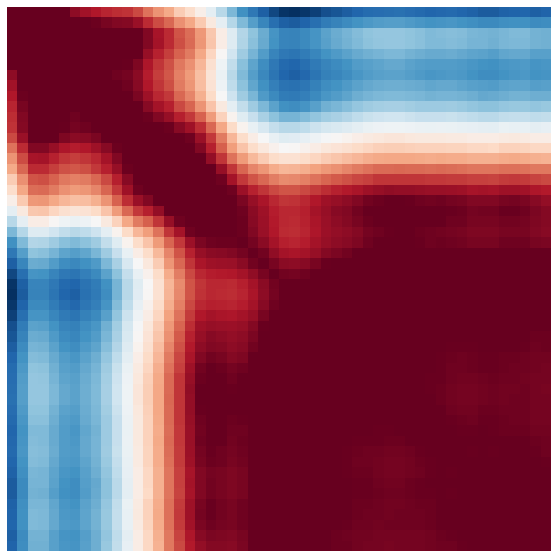

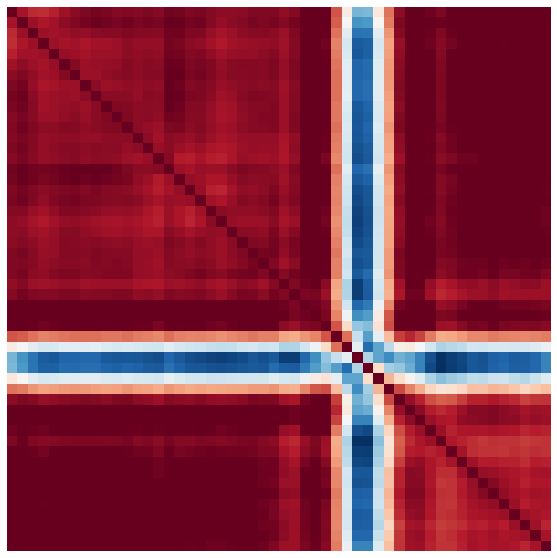

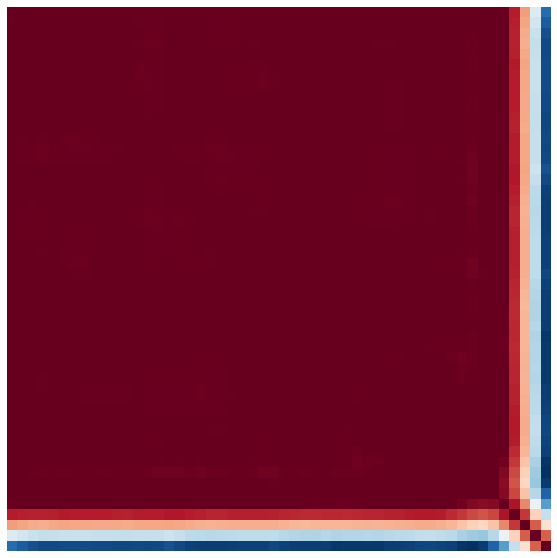

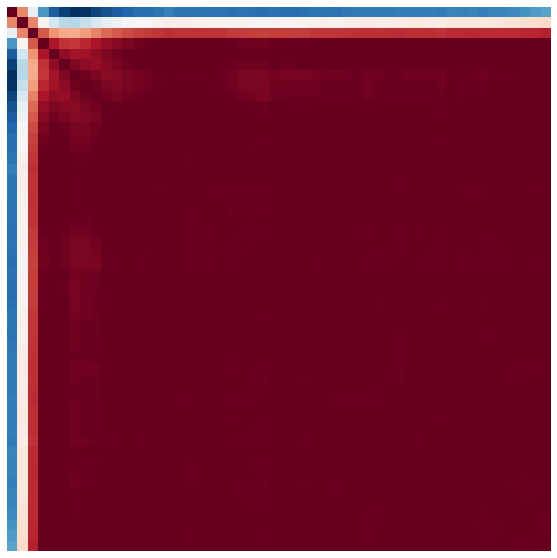

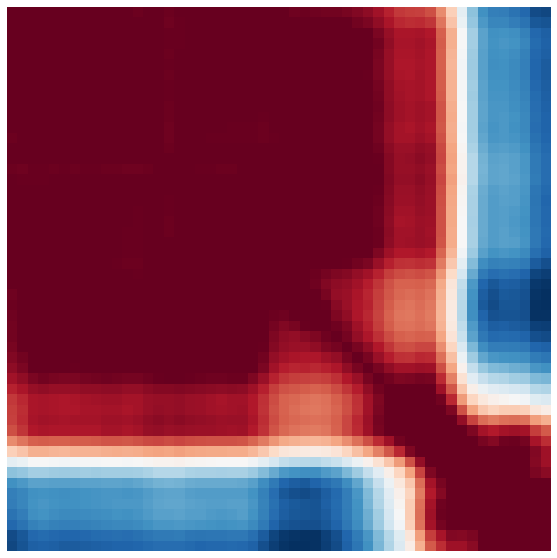

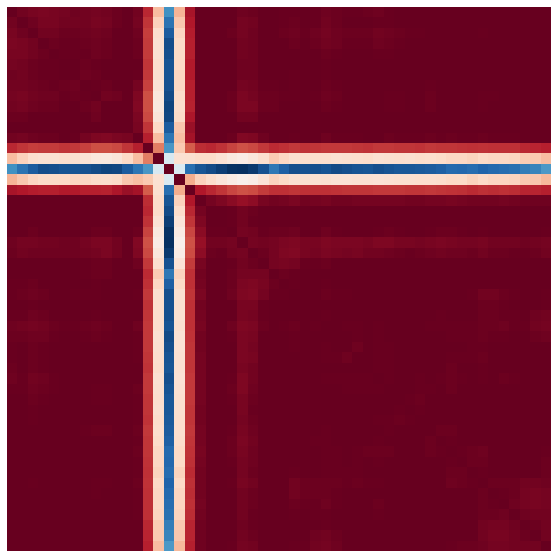

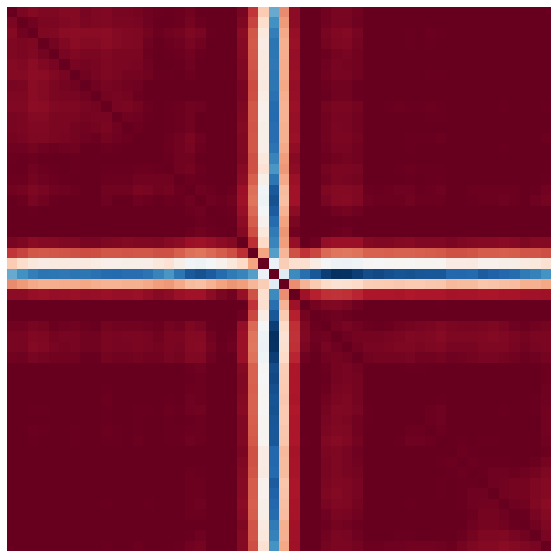

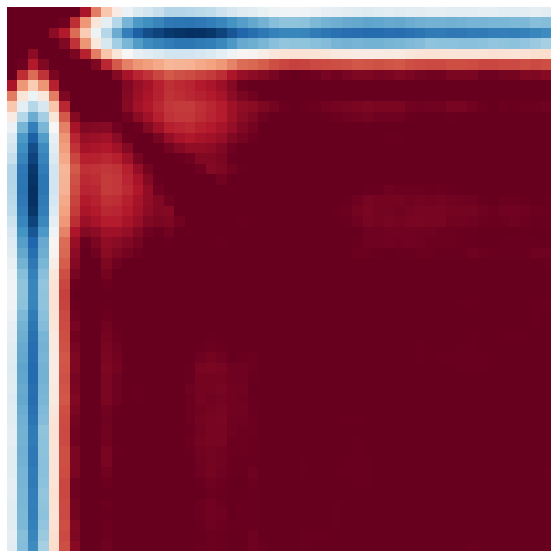

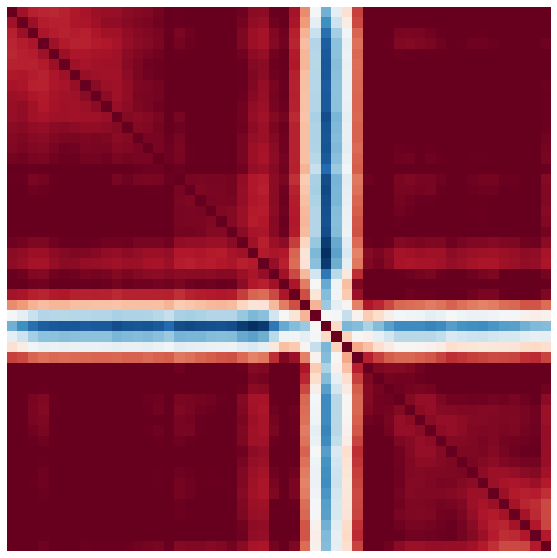

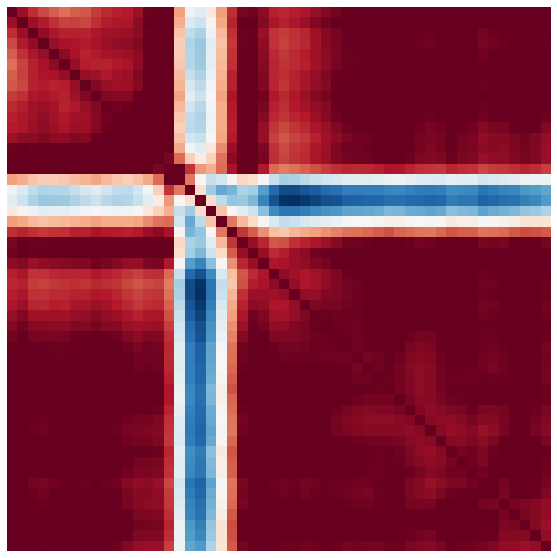

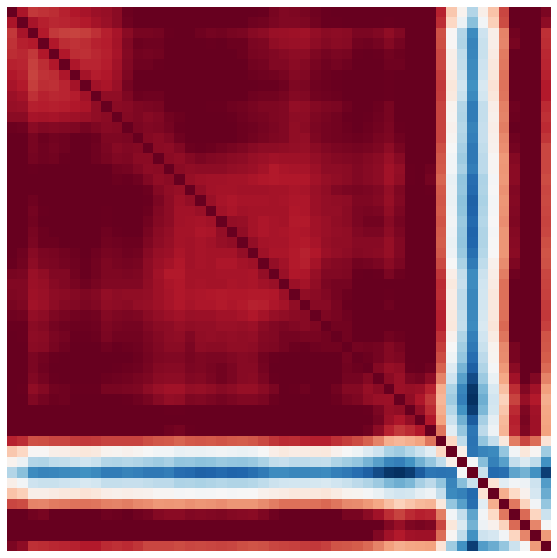

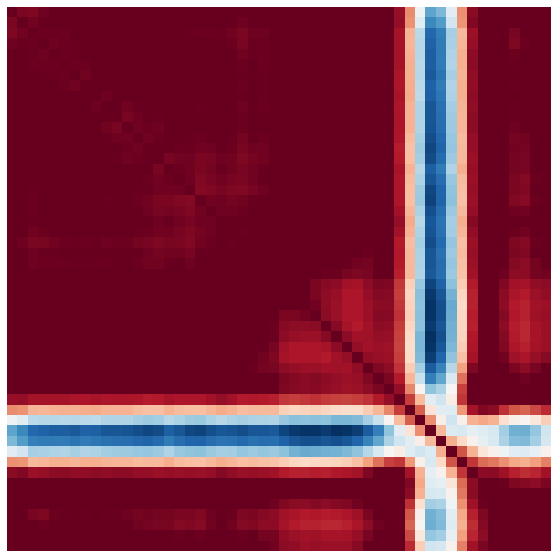

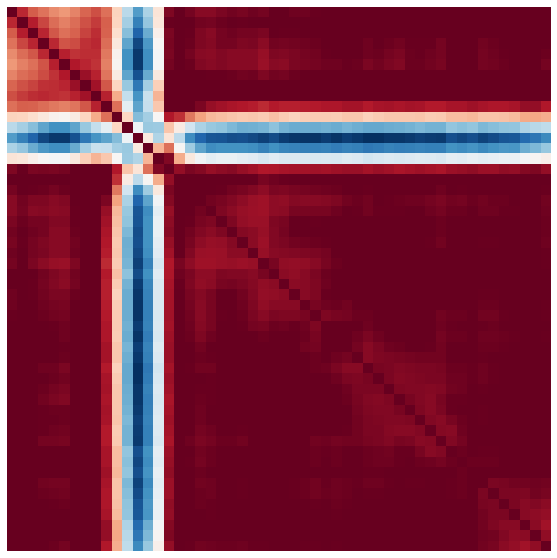

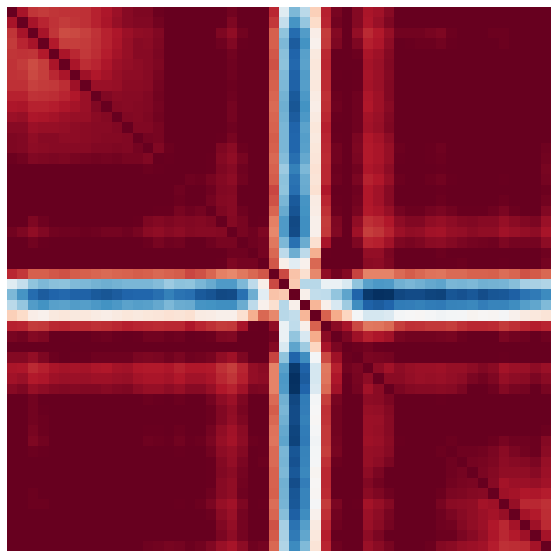

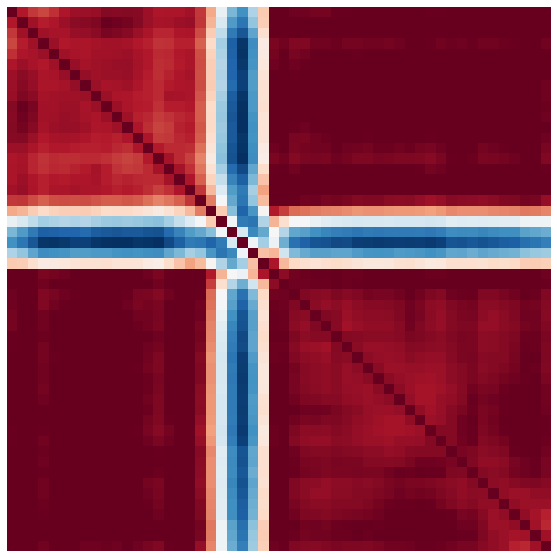

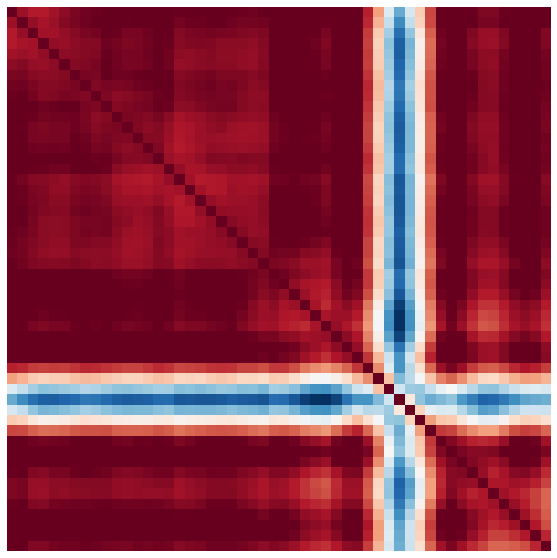

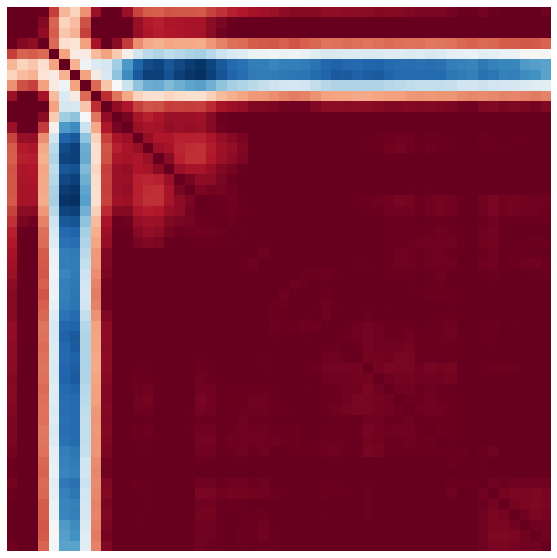

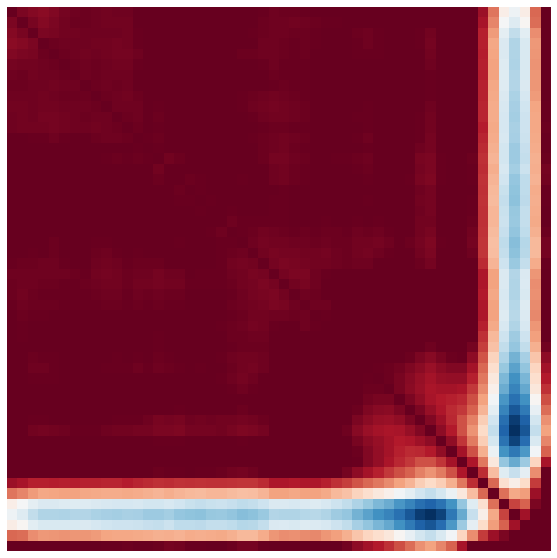

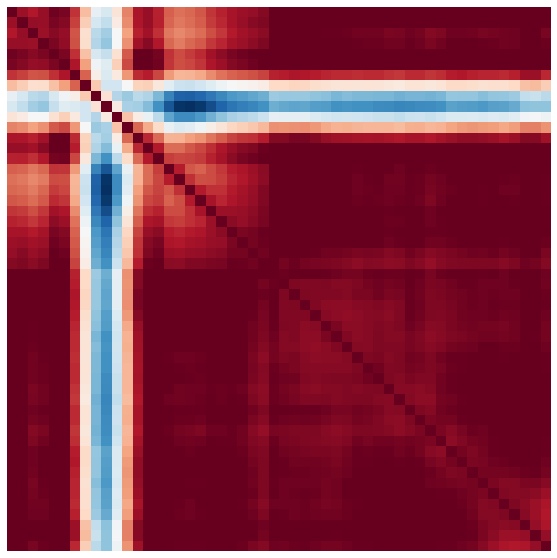

In [25]:
# Plot templates
chroma_factor.plot_nmf_maps()